#### Exercices from the book "Practical Machine Learning and Image Processing" (Himanshu Singh)
# Finding Palm Lines

Creating useful functions for getting and showing images

In [69]:
import os
from os import walk
from pylab import *
from skimage import io

def get_images(path):
    real_images = []
    for _, _, images in walk(path):
        for image in images:
            img = cv2.imread(os.path.join(path, image))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            real_images.append(img)
    return real_images

def show_images(images):
    i=0
    for image in images:
        figure(i)
        io.imshow(image)
        i += 1

Calling those functions:

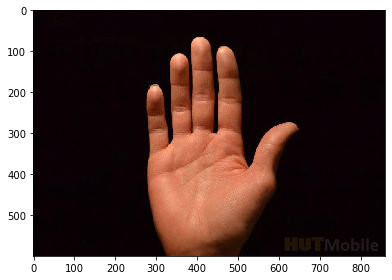

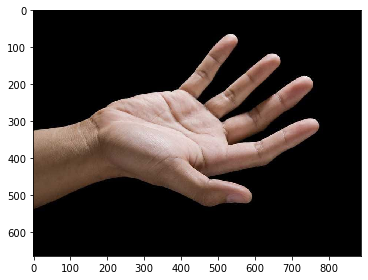

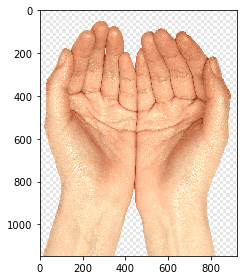

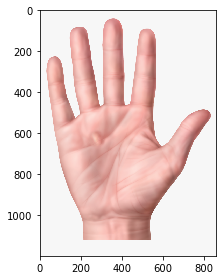

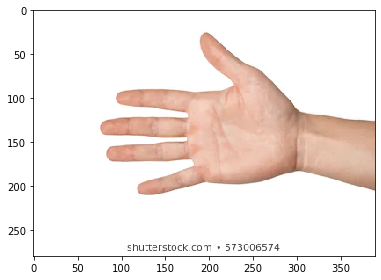

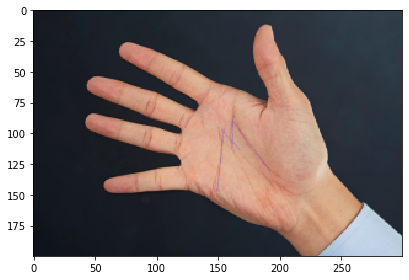

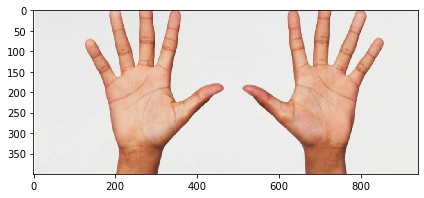

In [70]:
imgs = get_images('../input/hands/hands')
show_images(imgs)

#### Converting to gray scale:

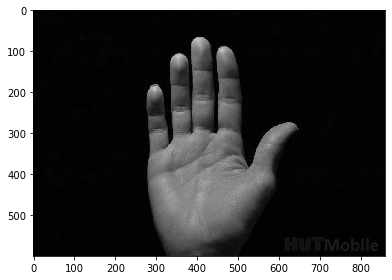

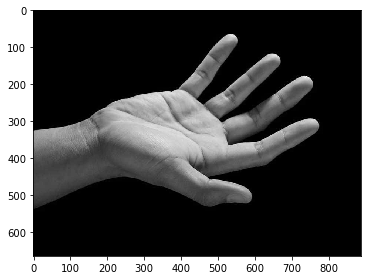

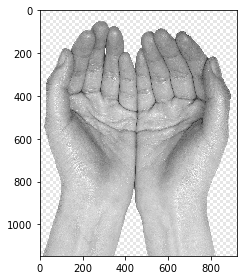

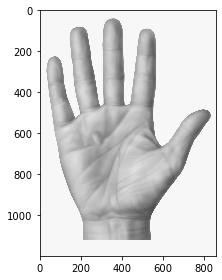

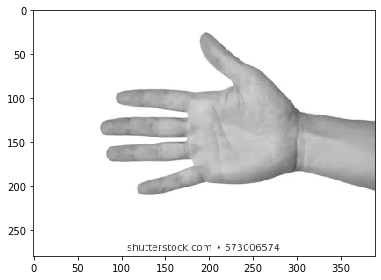

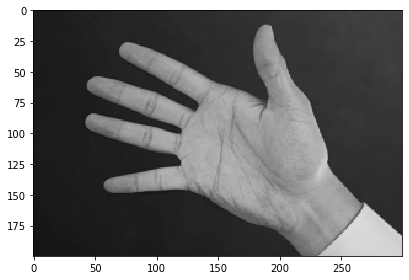

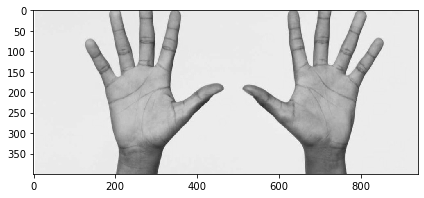

In [73]:
def convert_gray(imgs):
    gray_images = []
    for img in imgs:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray_images.append(gray_img)
    return gray_images

gray = convert_gray(imgs)
show_images(gray)

## Then we use the filter algorithm "Canny Edge Detector" to find the palm lines:

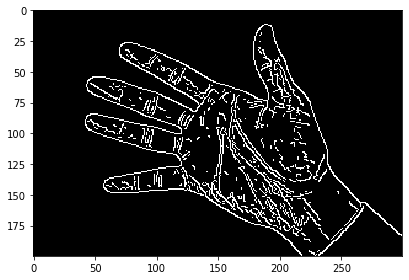

In [44]:
edges0 = cv2.Canny(gray0, 40, 55, apertureSize=3)

figure(0)
io.imshow(edges0)

Now we revert the colors so that recognized lines are to black:

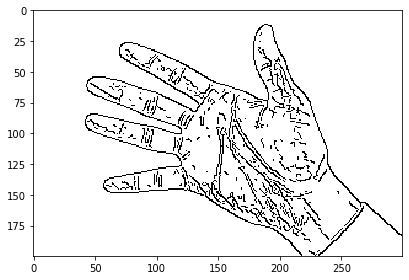

In [45]:
edges0 = cv2.bitwise_not(edges0)

figure(0)
io.imshow(edges0)

### Next we blend the previous image with the original one:

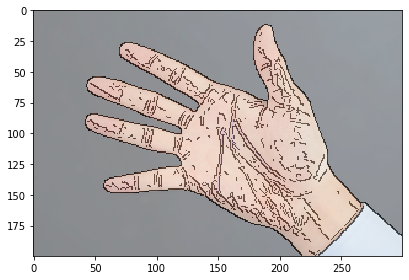

In [46]:
# the 2 images need to have the same number of channels, so im putting 3 channels in the edges0 image:
edges0 = cv2.cvtColor(edges0, cv2.COLOR_GRAY2BGR)

img0 = cv2.addWeighted(edges0, 0.5, hand0, 0.5, 0)

figure(0)
io.imshow(img0)